## Breast Cancer Detection Project

(Using Keras TF 2.0)

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
# EDA

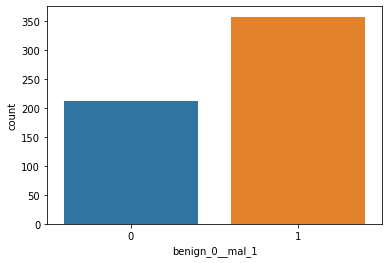

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

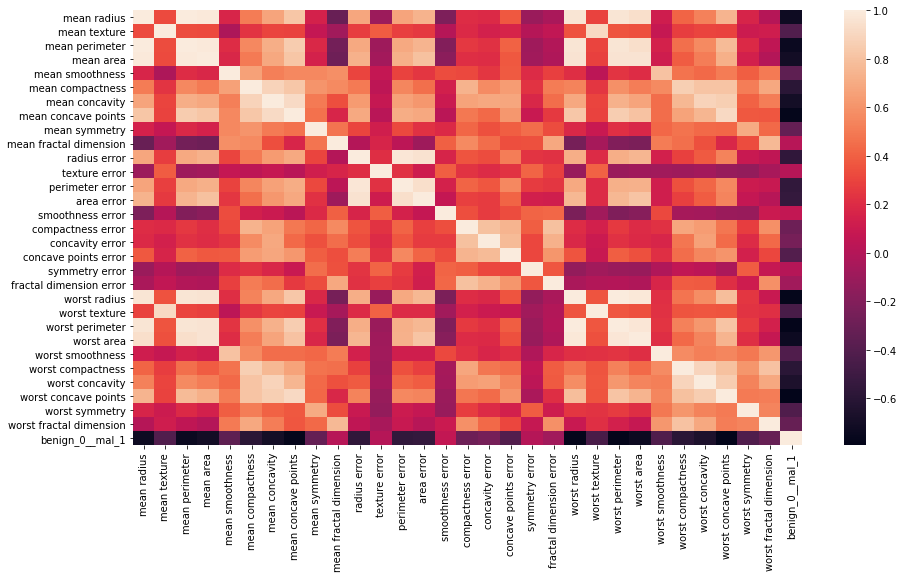

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

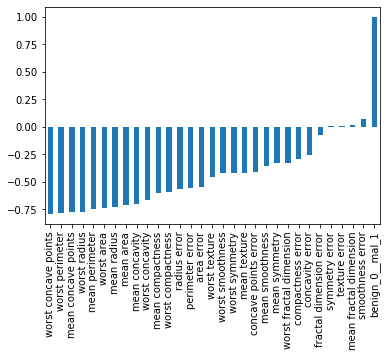

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

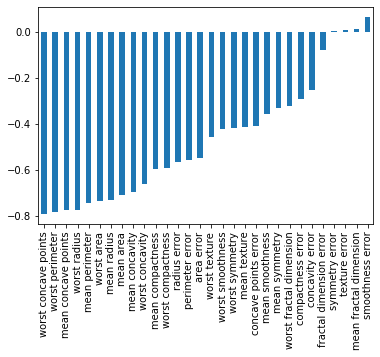

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [12]:
# Train Test Split

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [16]:
# Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Creating the Model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

# Binary Classification
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
# Training the Model

In [26]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7120 - val_loss: 0.6868
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6689 - val_loss: 0.6458
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6248 - val_loss: 0.5961
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5723 - val_loss: 0.5377
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5162 - val_loss: 0.4819
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4607 - val_loss: 0.4236
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4045 - val_loss: 0.3692
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3524 - val_loss: 0.3184
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3096 - val_loss: 0.2849
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2788 - val_loss: 0.2565
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0484 - val_loss: 0.1333
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0475 - val_loss: 0.1322
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0465 - val_loss: 0.1320
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0466 - val_loss: 0.1309
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0464 - val_loss: 0.1401
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0481 - val_loss: 0.1292
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0465 - val_loss: 0.1329
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0484 - val_loss: 0.1263
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0492 - val_loss: 0.1339
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0451 - val_loss: 0.1312
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0264 - val_loss: 0.1775
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0255 - val_loss: 0.1648
Epoch 247/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0257 - val_loss: 0.1730
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0260 - val_loss: 0.1695
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0338 - val_loss: 0.1969
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.1599
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0309 - val_loss: 0.1747
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0344 - val_loss: 0.1620
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0375 - val_loss: 0.1757
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0282 - val_loss: 0.1635
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.2170
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.2498
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.2134
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.2148
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.2301
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.2225
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.2239
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.2287
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.2437
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.2175
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.2810
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.2921
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.2798
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.3191
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.2691
Epoch 574/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.2835
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.2954
Epoch 576/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.2877
Epoch 577/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.2794
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.2915
Epoc

In [27]:
model_loss = pd.DataFrame(model.history.history)

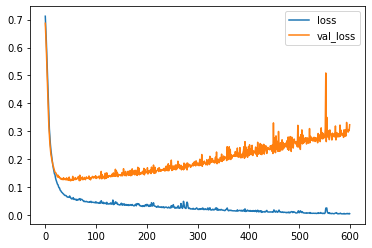

In [28]:
model_loss.plot()

In [29]:
# Early Stopping

In [30]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

# Binary Classification
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [33]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6936 - val_loss: 0.6816
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6694 - val_loss: 0.6591
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6455 - val_loss: 0.6322
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6165 - val_loss: 0.5970
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5733 - val_loss: 0.5501
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5246 - val_loss: 0.4969
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4696 - val_loss: 0.4357
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4084 - val_loss: 0.3715
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3534 - val_loss: 0.3163
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3067 - val_loss: 0.2753
Epoch 11/

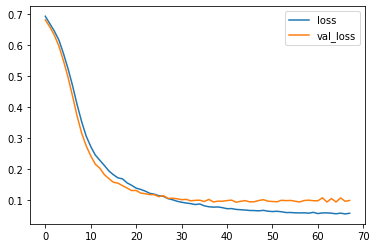

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [35]:
# Adding in DropOut Layers

In [36]:
from tensorflow.keras.layers import Dropout

In [37]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

# Binary classification
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6877 - val_loss: 0.6694
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6753 - val_loss: 0.6574
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6517 - val_loss: 0.6343
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6284 - val_loss: 0.6082
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6160 - val_loss: 0.5829
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5963 - val_loss: 0.5545
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5671 - val_loss: 0.5251
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5476 - val_loss: 0.4861
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5378 - val_loss: 0.4557
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5021 - val_loss: 0.4278
Epoch 11/

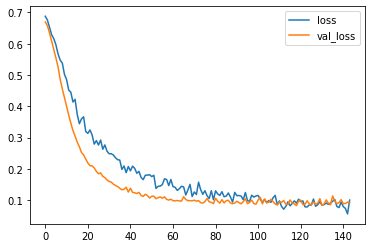

In [39]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [40]:
# Model Evaluation

In [45]:
predictions = model.predict_classes(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [48]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]
